# Block 5 Exercise 1: Classification

## MNIST Data
In these exercises we are using the MNIST data set on handwritten digits to compare supervised classification algorithms...   

In [0]:
#imports 
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import fetch_openml

In [0]:
# Load data from https://www.openml.org/d/554
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)


In [3]:
#the full MNIST data set contains 70k samples of digits 0-9 as 28*28 gray scale images (represented as 784 dim vectors)
np.shape(X)

(70000, 784)

### E1.1: Use SkLearn methods to split the MNIST data into random train and test sets. Use 60k samples for training.  


In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/7, random_state=42)

### E1.2: Visualize the data.
* Plot some data samples as images (use https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.imshow.html)

In [5]:
np.shape(X_train)

(60000, 784)

In [0]:
def showSample(sampleNumber):
  image = X_train[sampleNumber:sampleNumber+1,:].reshape(28,28)
  plt.imshow(image, cmap='gray')

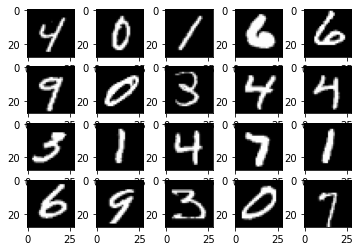

In [7]:
fig=plt.figure()

for i in range(1,21):
  fig.add_subplot(4,5,i)
  showSample(i)
  
plt.show()

### E1.3: Train models on the train data.
Train the following models with default parameters on the train data.
* [Naive Bayes](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html#sklearn.naive_bayes.GaussianNB) (assuming a Gaussian distribution of the data)
* [Simple linear model](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html#sklearn.linear_model.SGDClassifier)
   * use ``loss='log'`` to reproduce our logistic loss function 
* [Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier)

Compare the training accuracy (https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score) and [confusion matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html#sklearn.metrics.confusion_matrix) for all three models.

In [8]:
from sklearn.naive_bayes import GaussianNB
clfNaive = GaussianNB()
clfNaive.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [9]:
from sklearn import linear_model
clfLinear = linear_model.SGDClassifier(max_iter=100, tol=1e-3, loss='log')
clfLinear.fit(X_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=1000,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [14]:
from sklearn.ensemble import RandomForestClassifier
clfRandom = RandomForestClassifier()
clfRandom.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


gauss_train = clfNaive.predict(X_train)
linear_train = clfLinear.predict(X_train)
randomForest_train = clfRandom.predict(X_train)

In [0]:
gauss_trainAccuracy = accuracy_score(y_train, gauss_train)
linear_trainAccuracy = accuracy_score(y_train, linear_train)
randomForest_trainAccuracy = accuracy_score(y_train, randomForest_train)

In [17]:
print('NaiveGaussian Train Accuracy: ', gauss_trainAccuracy, ' Linear Train Accuracy: ', linear_trainAccuracy, ' RandomForest Train Accuracy', randomForest_trainAccuracy)

NaiveGaussian Train Accuracy:  0.5571666666666667  Linear Train Accuracy:  0.9001833333333333  RandomForest Train Accuracy 1.0


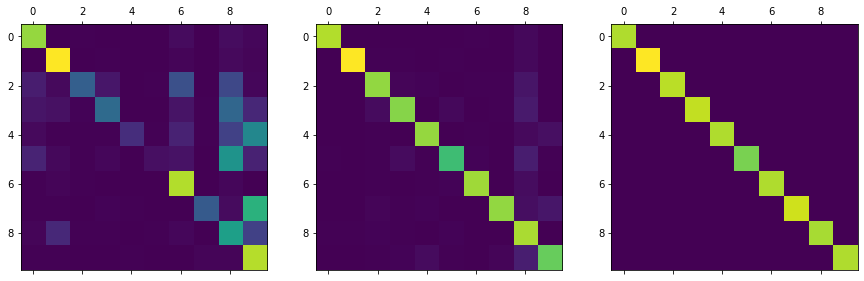

In [18]:
plt.figure(figsize=(15,10))
plt.subplot(1,3,1)
plt.matshow(confusion_matrix(y_train, gauss_train), fignum=False)
plt.subplot(1,3,2)
plt.matshow(confusion_matrix(y_train, linear_train), fignum=False)
plt.subplot(1,3,3)
plt.matshow(confusion_matrix(y_train, randomForest_train), fignum=False)
plt.show()

### E1.4: Evaluate and compare the models on the test set.
* compute the test [accuracy](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score) 
* compute the [F-Measure](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score)
* plot a [ROC curves](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve) for the class "5" for all three models.
                          

In [0]:
gaussian = clfNaive.predict(X_test)

In [0]:
linear = clfLinear.predict(X_test)

In [0]:
randomForest = clfRandom.predict(X_test)

In [0]:
gaussianAccuracy = accuracy_score(y_test, gaussian)
linearAccuracy = accuracy_score(y_test, linear)
randomForestAccuracy = accuracy_score(y_test, randomForest)

In [23]:
print('NaiveGaussian Test Accuracy: ', gaussianAccuracy, ' Linear Test Accuracy: ', linearAccuracy, ' RandomForest Test Accuracy', randomForestAccuracy)

NaiveGaussian Test Accuracy:  0.5604  Linear Test Accuracy:  0.8866  RandomForest Test Accuracy 0.9669


In [0]:
from sklearn.metrics import f1_score

gaussianAccuracy = f1_score(y_test, gaussian, average='weighted')
linearAccuracy = f1_score(y_test, linear, average='weighted')
randomForestAccuracy = f1_score(y_test, randomForest, average='weighted')

In [25]:
print('NaiveGaussian Accuracy: ', gaussianAccuracy, ' Linear Accuracy: ', linearAccuracy, ' RandomForest Accuracy', randomForestAccuracy)

NaiveGaussian Accuracy:  0.5187285177389869  Linear Accuracy:  0.8892857190643851  RandomForest Accuracy 0.9668851422115211


In [0]:
y_true = y_test.astype(int)==5

In [0]:
y_pred_gauss = gaussian.astype(int)==5

In [0]:
y_pred_linear = linear.astype(int)==5

In [0]:
y_pred_randomForest = randomForest.astype(int)==5

In [30]:
y_true

array([False, False, False, ..., False, False, False])

In [0]:
from sklearn.metrics import roc_curve

fpr_gaussian, tpr_gaussian, _ = roc_curve(y_true, y_pred_gauss)

fpr_linear, tpr_linear, _ = roc_curve(y_true, y_pred_linear)

fpr_randomForest, tpr_randomForest, _ = roc_curve(y_true, y_pred_randomForest)

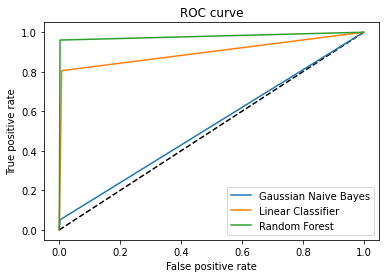

In [32]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_gaussian, tpr_gaussian, label='Gaussian Naive Bayes')
plt.plot(fpr_linear, tpr_linear, label='Linear Classifier')
plt.plot(fpr_randomForest, tpr_randomForest, label='Random Forest')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()